# Lab 2: Linear Regression

Author: Seungjae Lee (이승재)

<div class="alert alert-warning">
    We use elemental PyTorch to implement linear regression here. However, in most actual applications, abstractions such as <code>nn.Module</code> or <code>nn.Linear</code> are used.
</div>

## Theoretical Overview

$$ H(x) = Wx + b $$

$$ cost(W, b) = \frac{1}{m} \sum^m_{i=1} \left( H(x^{(i)}) - y^{(i)} \right)^2 $$

 - $H(x)$: 주어진 $x$ 값에 대해 예측을 어떻게 할 것인가
 - $cost(W, b)$: $H(x)$ 가 $y$ 를 얼마나 잘 예측했는가

## Imports

In [1]:
import torch
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim

In [2]:
# For reproducibility
torch.manual_seed(1)

## Data

We will use fake data for this example.

In [3]:
x_train = torch.FloatTensor([[1], [2], [3]])
y_train = torch.FloatTensor([[1], [2], [3]])

In [4]:
print(x_train)
print(x_train.shape)

tensor([[1.],
        [2.],
        [3.]])
torch.Size([3, 1])


In [5]:
print(y_train)
print(y_train.shape)

tensor([[1.],
        [2.],
        [3.]])
torch.Size([3, 1])


기본적으로 PyTorch는 NCHW 형태이다.

## Weight Initialization

In [6]:
W = torch.zeros(1, requires_grad=True)
print(W)

tensor([0.], requires_grad=True)


In [7]:
b = torch.zeros(1, requires_grad=True)
print(b)

tensor([0.], requires_grad=True)


## Hypothesis

$$ H(x) = Wx + b $$

In [8]:
hypothesis = x_train * W + b
print(hypothesis)

tensor([[0.],
        [0.],
        [0.]], grad_fn=<AddBackward0>)


## Cost

정답과 얼마나 가까운지 구하는 함수: cost

$$ cost(W, b) = \frac{1}{m} \sum^m_{i=1} \left( H(x^{(i)}) - y^{(i)} \right)^2 $$

In [9]:
print(hypothesis)

tensor([[0.],
        [0.],
        [0.]], grad_fn=<AddBackward0>)


In [10]:
print(y_train)

tensor([[1.],
        [2.],
        [3.]])


In [11]:
print(hypothesis - y_train)

tensor([[-1.],
        [-2.],
        [-3.]], grad_fn=<SubBackward0>)


In [12]:
print((hypothesis - y_train) ** 2)

tensor([[1.],
        [4.],
        [9.]], grad_fn=<PowBackward0>)


In [13]:
cost = torch.mean((hypothesis - y_train) ** 2)
print(cost)

tensor(4.6667, grad_fn=<MeanBackward1>)


## Gradient Descent

In [14]:
optimizer = optim.SGD([W, b], lr=0.01)

In [15]:
optimizer.zero_grad()
cost.backward()
optimizer.step()

In [16]:
print(W)
print(b)

tensor([0.0933], requires_grad=True)
tensor([0.0400], requires_grad=True)


Let's check if the hypothesis is now better.

In [17]:
hypothesis = x_train * W + b
print(hypothesis)

tensor([[0.1333],
        [0.2267],
        [0.3200]], grad_fn=<AddBackward0>)


In [18]:
cost = torch.mean((hypothesis - y_train) ** 2)
print(cost)

tensor(3.6927, grad_fn=<MeanBackward1>)


## Training with Full Code

In reality, we will be training on the dataset for multiple epochs. This can be done simply with loops.

In [19]:
# 데이터
x_train = torch.FloatTensor([[1], [2], [3]])
y_train = torch.FloatTensor([[1], [2], [3]])
# 모델 초기화
W = torch.zeros(1, requires_grad=True)
b = torch.zeros(1, requires_grad=True)
# optimizer 설정
optimizer = optim.SGD([W, b], lr=0.01)

nb_epochs = 1000
for epoch in range(nb_epochs + 1):
    
    # H(x) 계산
    hypothesis = x_train * W + b
    
    # cost 계산
    cost = torch.mean((hypothesis - y_train) ** 2)

    # cost로 H(x) 개선
    optimizer.zero_grad()
    cost.backward()
    optimizer.step()

    # 100번마다 로그 출력
    if epoch % 100 == 0:
        print('Epoch {:4d}/{} W: {:.3f}, b: {:.3f} Cost: {:.6f}'.format(
            epoch, nb_epochs, W.item(), b.item(), cost.item()
        ))

Epoch    0/1000 W: 0.093, b: 0.040 Cost: 4.666667
Epoch  100/1000 W: 0.873, b: 0.289 Cost: 0.012043
Epoch  200/1000 W: 0.900, b: 0.227 Cost: 0.007442
Epoch  300/1000 W: 0.921, b: 0.179 Cost: 0.004598
Epoch  400/1000 W: 0.938, b: 0.140 Cost: 0.002842
Epoch  500/1000 W: 0.951, b: 0.110 Cost: 0.001756
Epoch  600/1000 W: 0.962, b: 0.087 Cost: 0.001085
Epoch  700/1000 W: 0.970, b: 0.068 Cost: 0.000670
Epoch  800/1000 W: 0.976, b: 0.054 Cost: 0.000414
Epoch  900/1000 W: 0.981, b: 0.042 Cost: 0.000256
Epoch 1000/1000 W: 0.985, b: 0.033 Cost: 0.000158


## High-level Implementation with `nn.Module`

Remember that we had this fake data.

In [20]:
x_train = torch.FloatTensor([[1], [2], [3]])
y_train = torch.FloatTensor([[1], [2], [3]])

이제 linear regression 모델을 만들면 되는데, 기본적으로 PyTorch의 모든 모델은 제공되는 `nn.Module`을 inherit 해서 만들게 됩니다.

In [21]:
class LinearRegressionModel(nn.Module):
    def __init__(self):
        super().__init__()
        self.linear = nn.Linear(1, 1)

    def forward(self, x):
        return self.linear(x)

모델의 `__init__`에서는 사용할 레이어들을 정의하게 됩니다. 여기서 우리는 linear regression 모델을 만들기 때문에, `nn.Linear` 를 이용할 것입니다. 그리고 `forward`에서는 이 모델이 어떻게 입력값에서 출력값을 계산하는지 알려줍니다.

In [22]:
model = LinearRegressionModel()

## Hypothesis

이제 모델을 생성해서 예측값 $H(x)$를 구해보자

In [23]:
hypothesis = model(x_train)

In [24]:
print(hypothesis)

tensor([[0.0739],
        [0.5891],
        [1.1044]], grad_fn=<ThAddmmBackward>)


## Cost

이제 mean squared error (MSE) 로 cost를 구해보자. MSE 역시 PyTorch에서 기본적으로 제공한다.

In [25]:
print(hypothesis)
print(y_train)

tensor([[0.0739],
        [0.5891],
        [1.1044]], grad_fn=<ThAddmmBackward>)
tensor([[1.],
        [2.],
        [3.]])


In [26]:
cost = F.mse_loss(hypothesis, y_train)

In [27]:
print(cost)

tensor(2.1471, grad_fn=<MseLossBackward>)


## Gradient Descent

마지막 주어진 cost를 이용해 $H(x)$ 의 $W, b$ 를 바꾸어서 cost를 줄여봅니다. 이때 PyTorch의 `torch.optim` 에 있는 `optimizer` 들 중 하나를 사용할 수 있습니다.

In [28]:
optimizer = optim.SGD(model.parameters(), lr=0.01)

In [29]:
optimizer.zero_grad()
cost.backward()
optimizer.step()

## Training with Full Code

이제 Linear Regression 코드를 이해했으니, 실제로 코드를 돌려 피팅시켜보겠습니다.

In [30]:
# 데이터
x_train = torch.FloatTensor([[1], [2], [3]])
y_train = torch.FloatTensor([[1], [2], [3]])
# 모델 초기화
model = LinearRegressionModel()
# optimizer 설정
optimizer = optim.SGD(model.parameters(), lr=0.01)

nb_epochs = 1000
for epoch in range(nb_epochs + 1):
    
    # H(x) 계산
    prediction = model(x_train)
    
    # cost 계산
    cost = F.mse_loss(prediction, y_train)
    
    # cost로 H(x) 개선
    optimizer.zero_grad()
    cost.backward()
    optimizer.step()
    
    # 100번마다 로그 출력
    if epoch % 100 == 0:
        params = list(model.parameters())
        W = params[0].item()
        b = params[1].item()
        print('Epoch {:4d}/{} W: {:.3f}, b: {:.3f} Cost: {:.6f}'.format(
            epoch, nb_epochs, W, b, cost.item()
        ))

Epoch    0/1000 W: -0.101, b: 0.508 Cost: 4.630286
Epoch  100/1000 W: 0.713, b: 0.653 Cost: 0.061555
Epoch  200/1000 W: 0.774, b: 0.514 Cost: 0.038037
Epoch  300/1000 W: 0.822, b: 0.404 Cost: 0.023505
Epoch  400/1000 W: 0.860, b: 0.317 Cost: 0.014525
Epoch  500/1000 W: 0.890, b: 0.250 Cost: 0.008975
Epoch  600/1000 W: 0.914, b: 0.196 Cost: 0.005546
Epoch  700/1000 W: 0.932, b: 0.154 Cost: 0.003427
Epoch  800/1000 W: 0.947, b: 0.121 Cost: 0.002118
Epoch  900/1000 W: 0.958, b: 0.095 Cost: 0.001309
Epoch 1000/1000 W: 0.967, b: 0.075 Cost: 0.000809


점점 $H(x)$ 의 $W$ 와 $b$ 를 조정해서 cost가 줄어드는 것을 볼 수 있습니다.

In [1]:
import matplotlib.pyplot as plt
import numpy as np

In [20]:
x = np.arange(1, 10, 1)
y = x * 2
W = np.arange(-5, 9, 0.1)

In [21]:
cost = [np.mean((w*x - y) ** 2) for w in W]

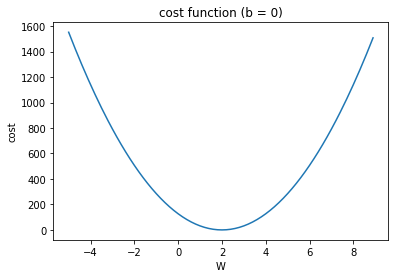

In [24]:
plt.plot(W, cost)
plt.title('cost function (b = 0)')
plt.xlabel('W')
plt.ylabel('cost')
plt.show()